In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

In [2]:
ticker = "GOOG"
start = "2017-04-01"
end = "2024-01-20"

In [3]:
df = yf.download(ticker, start=start, end=end)
df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-05,138.352005,138.809998,136.850006,137.389999,137.389999,15433200
2024-01-08,138.000000,140.639999,137.880005,140.529999,140.529999,17645300
2024-01-09,140.059998,142.800003,139.789993,142.559998,142.559998,19579700
2024-01-10,142.520004,144.524994,142.460007,143.800003,143.800003,16641900
2024-01-11,144.895004,146.660004,142.214996,143.669998,143.669998,17471100
2024-01-12,144.339996,144.740005,143.360001,144.240005,144.240005,13995200
2024-01-16,143.429993,145.839996,143.056000,144.080002,144.080002,19198900
2024-01-17,142.910004,143.410004,140.509995,142.889999,142.889999,17884500
2024-01-18,143.440002,145.585007,143.350006,144.990005,144.990005,18876800


In [4]:
ClosingPrice = df['Close']

# print(data)
print(ClosingPrice.values.shape)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(ClosingPrice.values.reshape(-1, 1))
# print(scaled_data)

(1711,)


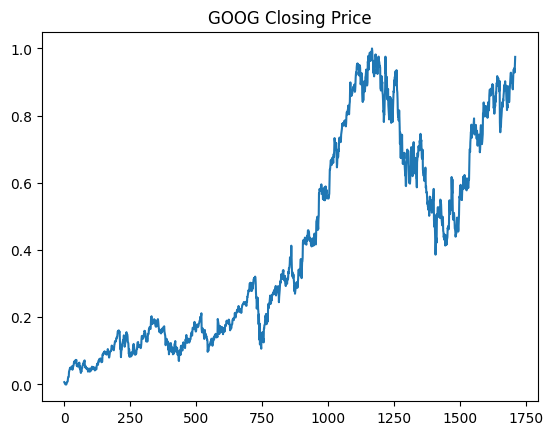

In [5]:
plt.plot(scaled_data)
plt.title(f'{ticker} Closing Price')
plt.show()

In [6]:
training_data_len = int(len(scaled_data) * 0.8)

training_data = scaled_data[0:training_data_len, :]
testing_data = scaled_data[training_data_len:, :]

len(training_data), len(testing_data)

(1368, 343)

In [7]:
past_values = 1

def create_training_data(data, past_values):
    if len(data) < past_values:
        return np.array([]), np.array([])
    X_train = []
    y_train = []
    for i in range(past_values, len(data)):
        X_train.append(data[i-past_values:i, 0])
        y_train.append(data[i, 0])
    return np.array(X_train), np.array(y_train)

X_train, y_train = create_training_data(training_data, past_values)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, y_test = create_training_data(testing_data, past_values)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [8]:
len(X_train) + len(X_test), len(scaled_data)

(1709, 1711)

In [9]:
X_train.shape

(1367, 1, 1)

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=200, epochs=200, verbose=1)

Epoch 1/200
7/7 [==============================] - 8s 11ms/step - loss: 0.1957
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 0.1516
Epoch 3/200
7/7 [==============================] - 0s 9ms/step - loss: 0.1124
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0840
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0769
Epoch 6/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0721
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0605
Epoch 8/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0475
Epoch 9/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0299
Epoch 10/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 11/200
7/7 [==============================] - 0s 16ms/step - loss: 0.0015
Epoch 12/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0024
Epoch 13/200
7/7 [==============================] - 

7/7 [==============================] - 0s 10ms/step - loss: 2.1040e-04
Epoch 100/200
7/7 [==============================] - 0s 8ms/step - loss: 2.0887e-04
Epoch 101/200
7/7 [==============================] - 0s 9ms/step - loss: 2.0818e-04
Epoch 102/200
7/7 [==============================] - 0s 8ms/step - loss: 2.1157e-04
Epoch 103/200
7/7 [==============================] - 0s 8ms/step - loss: 2.1677e-04
Epoch 104/200
7/7 [==============================] - 0s 9ms/step - loss: 2.1685e-04
Epoch 105/200
7/7 [==============================] - 0s 9ms/step - loss: 2.1176e-04
Epoch 106/200
7/7 [==============================] - 0s 10ms/step - loss: 2.0943e-04
Epoch 107/200
7/7 [==============================] - 0s 9ms/step - loss: 2.0831e-04
Epoch 108/200
7/7 [==============================] - 0s 9ms/step - loss: 2.0856e-04
Epoch 109/200
7/7 [==============================] - 0s 9ms/step - loss: 2.1139e-04
Epoch 110/200
7/7 [==============================] - 0s 9ms/step - loss: 2.1185e-04
Epoc

7/7 [==============================] - 0s 12ms/step - loss: 2.1124e-04
Epoch 196/200
7/7 [==============================] - 0s 10ms/step - loss: 2.1336e-04
Epoch 197/200
7/7 [==============================] - 0s 12ms/step - loss: 2.1387e-04
Epoch 198/200
7/7 [==============================] - 0s 10ms/step - loss: 2.2471e-04
Epoch 199/200
7/7 [==============================] - 0s 11ms/step - loss: 2.1374e-04
Epoch 200/200
7/7 [==============================] - 0s 10ms/step - loss: 2.0794e-04


In [11]:
pred_train = model.predict(X_train)
pred = model.predict(X_test)

11/11 [==============================] - 0s 3ms/step


In [12]:
pred_train = scaler.inverse_transform(pred_train)
pred = scaler.inverse_transform(pred)
y_test = scaler.inverse_transform([y_test])
y_train = scaler.inverse_transform([y_train])

In [13]:
y_test = y_test.flatten()
y_train = y_train.flatten()

Training Error
Mean Absolute Error (MAE): 1.0337596884938862
Root Mean Squared Error (RMSE): 1.5759870147972521


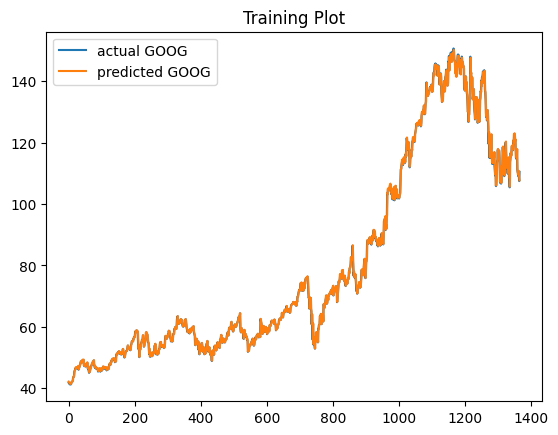

In [14]:
print("Training Error")
mae = mean_absolute_error(y_train, pred_train)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_train, pred_train))
print("Root Mean Squared Error (RMSE):", rmse)
    
plt.plot(y_train, label = 'actual '+str(ticker))
plt.plot(pred_train, label = 'predicted '+str(ticker))
plt.title("Training Plot")
plt.legend()
plt.show()

Testing Error
Mean Absolute Error (MAE): 1.6862294158043227
Root Mean Squared Error (RMSE): 2.2942741237792195


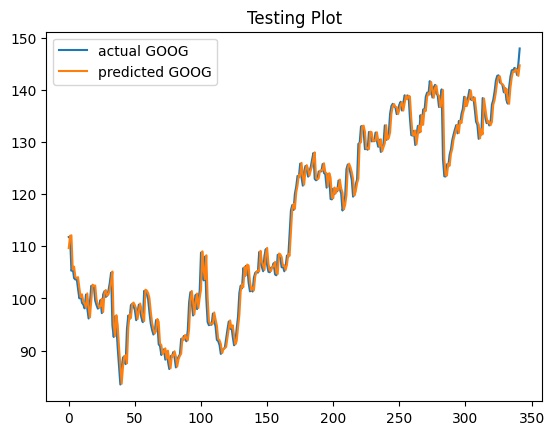

In [15]:
print("Testing Error")
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_test, pred))
print("Root Mean Squared Error (RMSE):", rmse)

plt.plot(y_test, label = 'actual '+str(ticker))
plt.plot(pred, label = 'predicted '+str(ticker))
plt.title("Testing Plot")
plt.legend()
plt.show()

## 5 days future prediction without correction

In [16]:
scaled_data

array([[0.00693803],
       [0.00512135],
       [0.00367897],
       ...,
       [0.92862066],
       [0.94779153],
       [0.97499579]])

In [17]:
len(X_train), len(X_test),  len(scaled_data)

(1367, 342, 1711)

In [18]:
reshaped_data = scaled_data.reshape(scaled_data.shape[0], scaled_data.shape[1], 1)

In [19]:
future_data_to_predict = reshaped_data[-10:]
future_data_to_predict

array([[[0.87841138]],

       [[0.90707631]],

       [[0.92560808]],

       [[0.93692804]],

       [[0.93574124]],

       [[0.94094481]],

       [[0.93948414]],

       [[0.92862066]],

       [[0.94779153]],

       [[0.97499579]]])

In [20]:
X_test.ndim, reshaped_data.ndim

(3, 3)

In [21]:
def predict_future(last_input):
    
    res = model.predict(last_input)
    Output = scaler.inverse_transform(res)
    return Output

future_predictions_1 = predict_future(future_data_to_predict)
# print(future_predictions_1)

future_predictions_1 = future_predictions_1.flatten()
print(future_predictions_1)

1/1 [==============================] - 0s 42ms/step
[137.34444 140.40599 142.3792  143.58208 143.45604 144.00845 143.85342
 142.69948 144.73466 147.61319]


In [22]:
# def predict_future(last_input):
    
#     res = model.predict(last_input)
#     Output = scaler.inverse_transform(res)
#     return Output

# future_predictions_2 = predict_future(X_test[-5:])
# # print(future_predictions_2)

# future_predictions_2 = future_predictions_2.flatten()
# print(future_predictions_2)

In [23]:
day=range(1,(len(future_data_to_predict)+1))

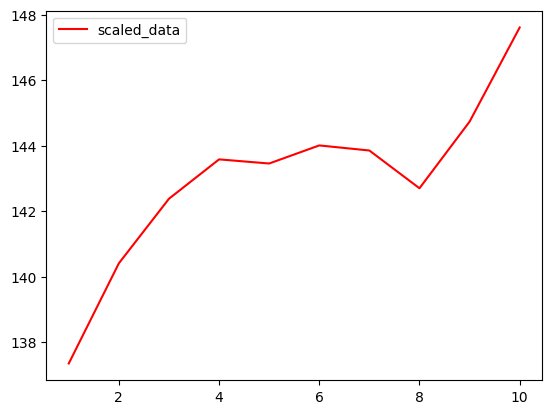

In [24]:
plt.plot(day, future_predictions_1, color='red', label='scaled_data')
# plt.plot(day, future_predictions_2, color='blue', label='x_test')
plt.legend()
plt.show()

In [25]:
# ticker = "AMZN"
# start='2024-01-22'
# end='2024-01-26'
# df = yf.download(ticker, start=start, end=end)
# # print(df)
# actual = df['Close'].values
# print(actual)

In [26]:
# day_actual = np.arange(1,21)
# day_pred = np.arange(1,21)

In [27]:
# plt.figure(figsize=(8,6))
# plt.title(f'Plot for {ticker} from {start} till {end}')
# plt.xlabel('No. of Days')
# plt.ylabel('Price Values')
# plt.plot(day_actual, actual, label = 'actual price', color='blue')
# plt.plot(day_pred, future_predictions_1, label = 'predicted price', color='red')
# plt.legend()
# plt.show()

## Buy and Sell

In [28]:
def get_control_vector(val):
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    inv = []
    curr_val = 1000
    inds = np.where(controls)[0]
    buy_inds = np.where(controls>0)[0]
    sell_inds = np.where(controls<0)[0]
    max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
    for i in range(buy_inds[0]+2):
        inv.append(curr_val)
    for i in range(buy_inds[0],max_limit+1):
        if controls[i]>0:
            buy_val = val[i+1]
        elif controls[i]<0:
            sell_val = val[i+1]
            curr_val = curr_val*sell_val/buy_val
        inv.append(curr_val)
        
    if max_limit+1!=len(controls):
        for i in range(len(controls)-max_limit-1):
            inv.append(curr_val)
    return inv

# def buy_and_sell_bot(val, controls):
#     inv = []
#     curr_val = 1000
#     buy_inds = np.where(controls > 0)[0]
#     sell_inds = np.where(controls < 0)[0]
    
#     if buy_inds.size == 0 or sell_inds.size == 0:
#         return [curr_val] * len(controls)
    
#     max_limit = max(sell_inds[-1], buy_inds[-1])
#     for i in range(buy_inds[0] + 2):
#         inv.append(curr_val)
        
#     for i in range(buy_inds[0], max_limit + 1):
#         if controls[i] > 0:
#             buy_val = val[i + 1]
#         elif controls[i] < 0:
#             sell_val = val[i + 1]
#             curr_val = curr_val * sell_val / buy_val
#         inv.append(curr_val)
        
#     if max_limit + 1 != len(controls):
#         for i in range(len(controls) - max_limit - 1):
#             inv.append(curr_val)
    
#     return inv

In [29]:
controls_pred= get_control_vector(future_predictions_1)
amount_pred = buy_and_sell_bot(future_predictions_1, controls_pred)
controls_pred, amount_pred

(array([ 0.,  0., -2.,  2., -2.,  0.,  2.,  0.], dtype=float32),
 [1000,
  1000,
  1000,
  1000,
  1000,
  1000,
  1003.8507541587624,
  1003.8507541587624,
  1003.8507541587624,
  1003.8507541587624])

In [30]:
# controls_actual= get_control_vector(actual)
# amount_actual = buy_and_sell_bot(actual, controls_actual)
# controls_actual, amount_actual

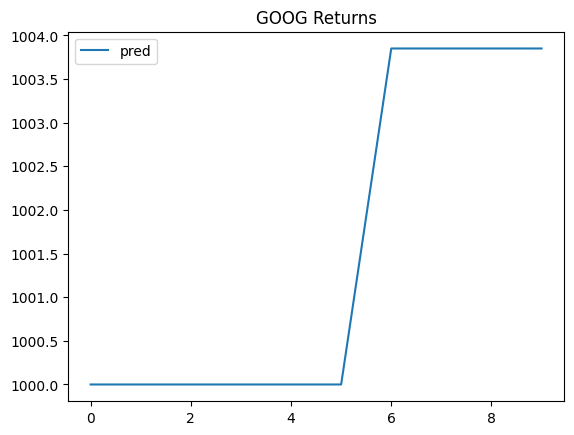

In [31]:
# plt.plot(amount_actual, label="actual")
plt.plot(amount_pred, label="pred")
plt.legend()
plt.title(f"{ticker} Returns")
plt.show()

### Price values along with dates

In [32]:
from datetime import datetime, timedelta
count=31
Date = []
for i in range(22,34):
    if i == 27:
        continue
    elif i == 28:
        continue
    elif i >= 32:
        i = i-count
        base_date = datetime(2024,2,i)
        formatted_date = base_date.strftime('%d-%m-%Y')
        Date.append(formatted_date)
    else:
        base_date = datetime(2024,1,i)
        formatted_date = base_date.strftime('%d-%m-%Y')
        Date.append(formatted_date)

In [33]:
price_value_dict = {}
price_value_dict['Date'] = Date
price_value_dict['Closing Price'] = future_predictions_1.tolist()

In [34]:
# price_value_dict

In [35]:
Price_with_dates = pd.DataFrame(price_value_dict)

In [36]:
Price_with_dates.columns = pd.MultiIndex.from_tuples([(f'{ticker}', 'Date'), (f'{ticker}', 'Closing Price')])

In [37]:
Price_with_dates

GOOG              
         Date Closing Price
0  22-01-2024    137.344437
1  23-01-2024    140.405991
2  24-01-2024    142.379196
3  25-01-2024    143.582077
4  26-01-2024    143.456039
5  29-01-2024    144.008453
6  30-01-2024    143.853424
7  31-01-2024    142.699478
8  01-02-2024    144.734665
9  02-02-2024    147.613190

In [38]:
ticker = "GOOG"
start = "2024-01-22"
end = "2024-01-31"

In [42]:
df = yf.download(ticker, start=start, end=end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-22,148.710007,150.014999,147.580002,147.710007,147.710007,21829200
2024-01-23,147.720001,148.860001,147.190002,148.679993,148.679993,14113600
2024-01-24,150.289993,151.570007,149.839996,150.350006,150.350006,19245000
2024-01-25,151.740005,154.759995,151.220001,153.639999,153.639999,21495100
2024-01-26,152.869995,154.110001,152.800003,153.789993,153.789993,19483600
2024-01-29,153.639999,155.199997,152.919998,154.839996,154.839996,20872100
2024-01-30,154.009995,155.039993,153.800003,154.464996,154.464996,7503515


In [43]:
actual_data = df['Close'].values

In [44]:
day_actual = range(1,8)
day_predicted = range(1,11)

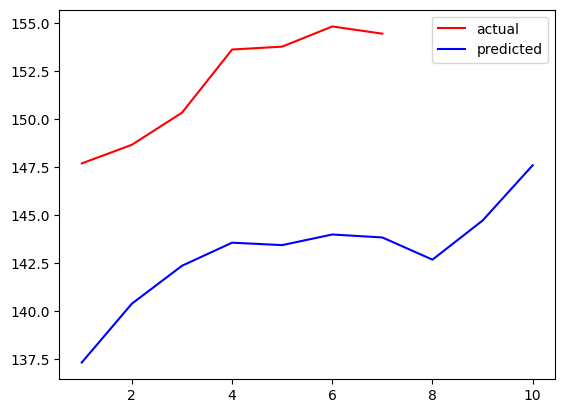

In [45]:
plt.plot(day_actual, actual_data, color='red', label='actual')
plt.plot(day_predicted, future_predictions_1, color='blue', label='predicted')
plt.legend()
plt.show()